In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ouverture du fichier 
df = pd.read_csv("../data/labels.csv",",",encoding='utf-8', low_memory=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [10]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [11]:
df.describe()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [13]:
df = df[df['offensive_language'] == 9]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
1296,1324,9,0,9,0,1,&#8220;@Hermosa_Jayy: Can I bring anotha bitch...
1491,1522,9,0,9,0,1,&#8220;@RileyyBryn: &#8220;@devon_sheaa: I jus...
1600,1635,9,0,9,0,1,"&#8220;@WEEEDITH: All I want is bitches, big b..."
1861,1899,9,0,9,0,1,&#8220;@najmaaa_ali: Lool I agree RT&#8220;@st...
2723,2789,9,0,9,0,1,"@CDNBallJunkie Spurs bitch that's the team, yo..."
...,...,...,...,...,...,...,...
23039,23522,9,0,9,0,1,Y'all hoes so ugh
23560,24052,9,0,9,0,1,"all these beautiful bitches, sucha beautiful t..."
23793,24288,9,0,9,0,1,errybody in dis bitch getting tips (whispers) ...
24204,24708,9,0,9,0,1,man kills mother of 2 after she reveals she's ...


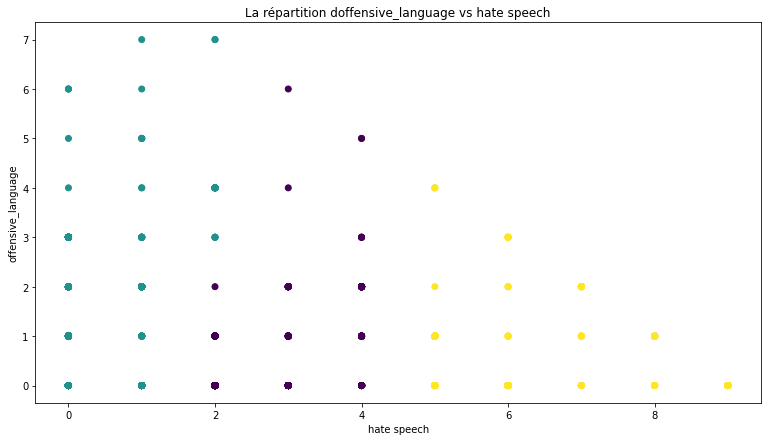

In [16]:
from sklearn.cluster import KMeans
d = {'offensive_language': df['offensive_language'], 'hate_speech': df['hate_speech']}
dfScatter = pd.DataFrame(data=d)

arr = dfScatter.to_numpy()
transformation = [[1, 0], [0, 1]]
X_aniso = np.dot(arr, transformation)

# Défintion du modèle K-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Prédictions
y_pred = kmeans.fit_predict(X_aniso)

# Graphique
plt.figure(figsize=(13,7))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title('La répartition doffensive_language vs hate speech') 
plt.ylabel('offensive_language')
plt.xlabel('hate speech')
plt.show()

